# Лабораторная работа 1.

Часть 1

1.       Найти на сайте РосСтат https://rosstat.gov.ru/free_doc/new_site/zdor22/PublishSite_2022/index.html данные, распределение которых было бы близко к

a) нормальному (визуально выглядит как кривая Гаусса - «колокол»),

 б) равномерному.

2.        Найти распределение со смещенной медианой относительно среднего (~15% размаха) и несмещенной.

3.       Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана),  дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).

https://support.microsoft.com/ru-ru/office/%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85-%D0%B2-excel-3223aab8-f543-4fda-85ed-76bb0295ffc4

Часть 2

Найти датасет с аномальными значениями, которые можно выявить, построив диаграмму размаха «ящик с усами». Попробовать выдвинуть гипотезу о причинах аномальности, которую можно подтвердить дальнейшими исследованиями, используя синтетические признаки (или  корреляционный анализ и т.п.).
 https://statanaliz.info/excel/diagrammy/diagramma-yashhik-s-usami-boxplot-v-excel-2016/

# Импорт библиотек

In [52]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

# Подключаем файлики

In [53]:
player_stats = pd.read_csv('players_stats_by_season_full_details.csv')

Добавим новую переменную - очков в минуту

In [54]:
player_stats['pts_per_minute'] = player_stats['PTS']/player_stats['MIN']

В качестве пояснения укажу, что это данные баскетбольной статистики с 1999 - 2020 год.
Полная информация по данному датасету размещена на сайте: https://www.kaggle.com/datasets/jacobbaruch/basketball-players-stats-per-season-49-leagues/

# Часть 1

## Найти  данные, распределение которых было бы близко к:

### а) нормальному (визуально выглядит как кривая Гаусса - «колокол»)

Предполагаю, что близко к нормальному будут данные о росте игроков, так давайте посмотрим...

In [55]:
player_stats.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53949 entries, 0 to 53948
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   League          53949 non-null  object 
 1   Season          53949 non-null  object 
 2   Stage           53949 non-null  object 
 3   Player          53949 non-null  object 
 4   Team            53938 non-null  object 
 5   GP              53949 non-null  int64  
 6   MIN             53949 non-null  float64
 7   FGM             53949 non-null  int64  
 8   FGA             53949 non-null  int64  
 9   3PM             53949 non-null  int64  
 10  3PA             53949 non-null  int64  
 11  FTM             53949 non-null  int64  
 12  FTA             53949 non-null  int64  
 13  TOV             53949 non-null  int64  
 14  PF              53949 non-null  int64  
 15  ORB             53949 non-null  int64  
 16  DRB             53949 non-null  int64  
 17  REB             53949 non-null 

C:\Users\UserProfile\AppData\Local\Temp\ipykernel_9680\1631201664.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snsplot = sns.kdeplot(player_stats['height_cm'], shade=True, alpha=0.7, bw_adjust=2)


Text(0.5, 0.98, 'Распределение роста баскетболистов')

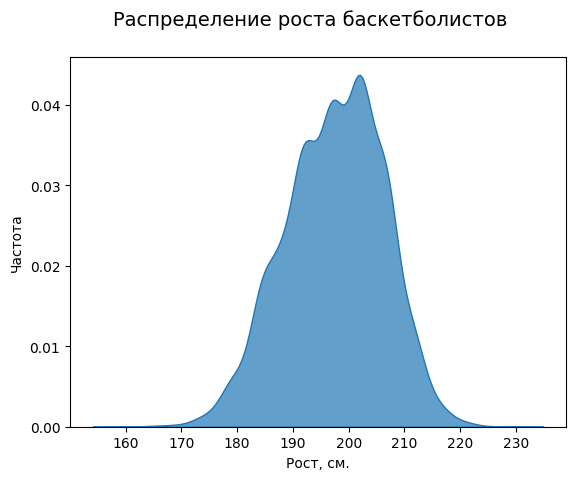

In [56]:
snsplot = sns.kdeplot(player_stats['height_cm'], shade=True, alpha=0.7, bw_adjust=2)
fig = snsplot.get_figure()


plt.xlabel("Рост, см.")
plt.ylabel("Частота")
plt.suptitle("Распределение роста баскетболистов", fontsize=14)

# б) равномерному.

Предполагаю что к равномерному распределению будет близко количество очков игрока за карьеру. Посмотрим на колчество очков Пола Пирса за карьеру.

In [58]:
kobe_stats = player_stats[player_stats['Player'] == 'Kobe Bryant']

In [68]:
kobe_stats_group_by_year = kobe_stats.groupby(
    by='Season'
).agg({
    'pts_per_minute': 'sum'
}).reset_index()[6:13]

kobe_stats_group_by_year

,Season,pts_per_minute
6,2005 - 2006,1.484934
7,2006 - 2007,1.537816
8,2007 - 2008,1.461176
9,2008 - 2009,1.483078
10,2009 - 2010,1.422001
11,2010 - 2011,1.391173
12,2011 - 2012,1.480252


<Axes: xlabel='Season', ylabel='pts_per_minute'>

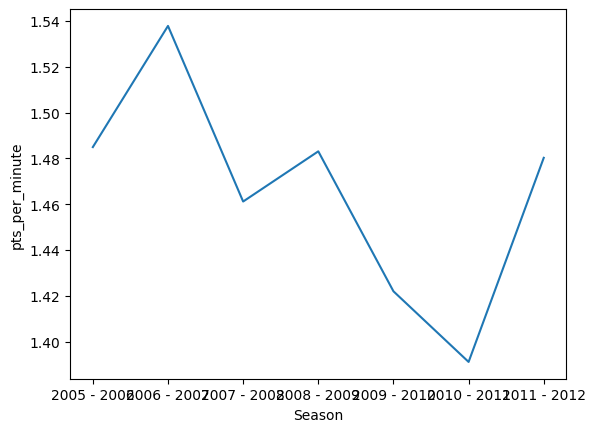

In [69]:
sns.lineplot(data=kobe_stats_group_by_year, x="Season", y="pts_per_minute")

## 2. Найти распределение со смещенной медианой относительно среднего (~15% размаха) и несмещенной.

C:\Users\UserProfile\AppData\Local\Temp\ipykernel_9680\1770851455.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snsplot = sns.kdeplot(player_stats['weight_kg'], shade=True, alpha=0.7, bw_adjust=2)


Text(0.5, 0.98, 'Распределение веса баскетболистов')

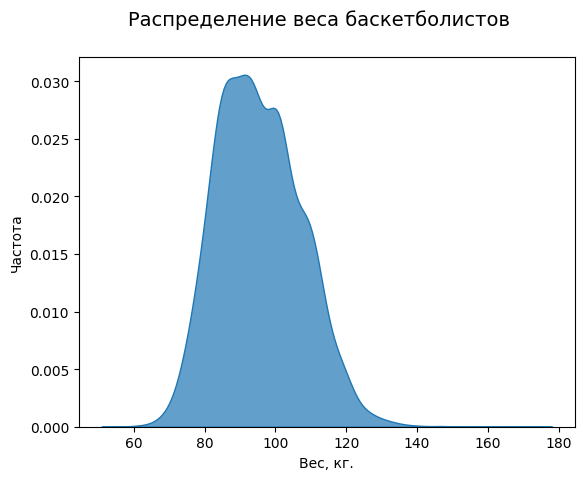

In [74]:
snsplot = sns.kdeplot(player_stats['weight_kg'], shade=True, alpha=0.7, bw_adjust=2)
fig = snsplot.get_figure()


plt.xlabel("Вес, кг.")
plt.ylabel("Частота")
plt.suptitle("Распределение веса баскетболистов", fontsize=14)

In [75]:
player_stats['weight_kg'].describe()

count    49385.000000
mean        95.422193
std         11.851299
min         59.000000
25%         86.000000
50%         95.000000
75%        104.000000
max        170.000000
Name: weight_kg, dtype: float64

In [76]:
player_stats['weight_kg'].median()

95.0

К сожалению не совсем понял задание. Нужно найти такое распределение или посчитать какую то характеристику?

## 3. Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана),  дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).

### Среднее

In [77]:
player_stats['height_cm'].describe()

count    53875.000000
mean       197.445123
std          8.728587
min        160.000000
25%        191.000000
50%        198.000000
75%        203.000000
max        229.000000
Name: height_cm, dtype: float64

### Медиана

In [78]:
player_stats['height_cm'].median()

198.0

### Мода

In [80]:
player_stats['height_cm'].mode()

0    203.0
Name: height_cm, dtype: float64

### График рассеивания

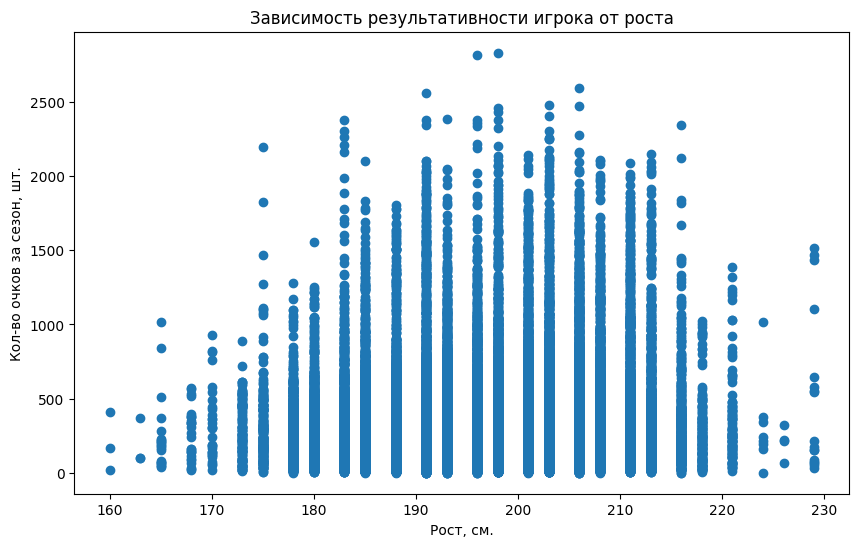

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = player_stats['height_cm'], y = player_stats['PTS'])
plt.xlabel("Рост, см.")
plt.ylabel("Кол-во очков за сезон, шт.")
plt.title('Зависимость результативности игрока от роста')
plt.show()

## Круговая диаграма

In [96]:
player_country = player_stats\
    .groupby(by='nationality')\
    .agg({'Player': 'count'})\
    .reset_index()\
    .sort_values(by='Player', ascending=False)\
    .head(10)

In [97]:
player_country

,nationality,Player
448,United States,19009
370,Serbia,2491
119,Croatia,1483
277,Lithuania,1284
408,Spain,1278
174,France,1251
12,Argentina,1119
200,Germany,1095
114,China,1067
394,Slovenia,912


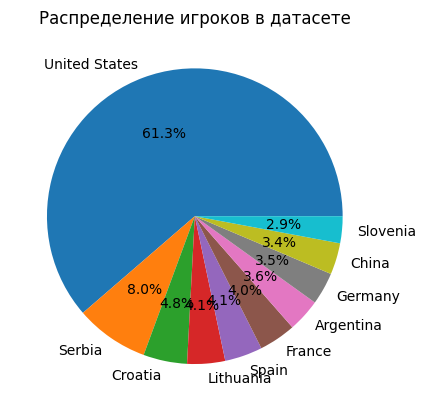

In [100]:
fig1, ax1 = plt.subplots()
ax1.pie(player_country['Player'], labels=player_country['nationality'], autopct='%1.1f%%')
plt.title('Распределение игроков в датасете')
plt.show()


# Часть 2


## Найти датасет с аномальными значениями, которые можно выявить, построив диаграмму размаха «ящик с усами». Попробовать выдвинуть гипотезу о причинах аномальности, которую можно подтвердить дальнейшими исследованиями, используя синтетические признаки (или  корреляционный анализ и т.п.).

Построим график распределения результативности игроков.

{'whiskers': [<matplotlib.lines.Line2D at 0x21cf0e75350>,
 'caps': [<matplotlib.lines.Line2D at 0x21cf0e76790>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cf0a6ca50>],
 'medians': [<matplotlib.lines.Line2D at 0x21cf0e77850>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cf0e84110>],
 'means': []}

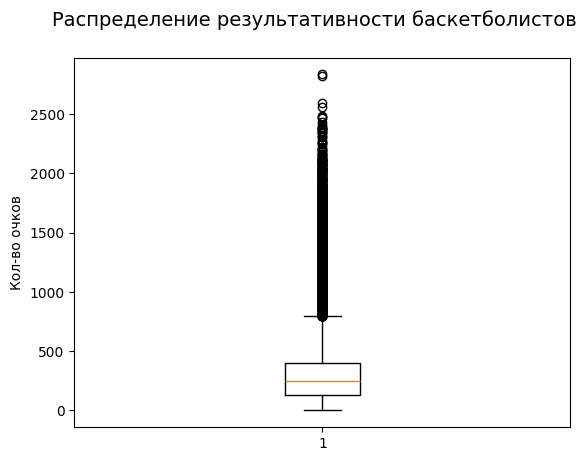

In [104]:
plt.ylabel("Кол-во очков")
plt.suptitle("Распределение результативности баскетболистов", fontsize=14)
plt.boxplot(player_stats['PTS'])

# Лабораторная работа №2: Случайные величины. Нормальный закон распределения. Моменты и критические границы случайной величины


1.	Найти на сайте РосСтат  https://rosstat.gov.ru/statistic   непрерывное распределение случайной величины, которое было бы близко к нормальному.
Построить графики распределения.
2.	Посчитать в распределение близком к нормальному  1 л.р. и найденном непрерывном распределении:
•	мат.ожидание (*)
•	2 (дисперсию) (**), 3 (асимметрию), 4 (эксцесс) моменты 
•	квантили уровня 0,05 и 0,95; 2,5%-ную точку  для найденной случайной величины. 
3.	Построить сравнительную диаграмму найденного распределения и распределения по нормальному закону с параметрами (*, **).


## 0.1. Импорт библиотек

In [37]:
!pip install scipy

     ---------------------------------------- 44.1/44.1 MB 3.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, lognorm
from matplotlib import pyplot as plt
import seaborn as sns

## 0.2. Подключение к данным

In [3]:
player_stats = pd.read_csv('players_stats_by_season_full_details.csv')

Добавим новую переменную - очков в минуту

In [4]:
player_stats['pts_per_minute'] = player_stats['PTS']/player_stats['MIN']

В качестве пояснения укажу, что это данные баскетбольной статистики с 1999 - 2020 год.
Полная информация по данному датасету размещена на сайте: https://www.kaggle.com/datasets/jacobbaruch/basketball-players-stats-per-season-49-leagues/

## 1. Найти непрерывное распределение случайной величины, которое было бы близко к нормальному. Построить графики распределения

Использую распределение роста баскетболистов.

C:\Users\UserProfile\AppData\Local\Temp\ipykernel_14460\1631201664.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snsplot = sns.kdeplot(player_stats['height_cm'], shade=True, alpha=0.7, bw_adjust=2)


Text(0.5, 0.98, 'Распределение роста баскетболистов')

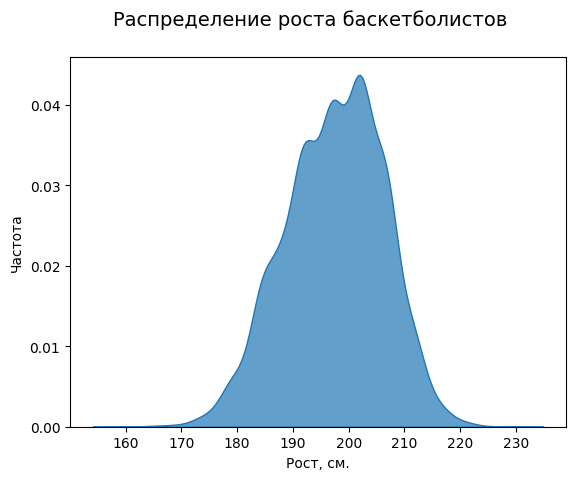

In [9]:
snsplot = sns.kdeplot(player_stats['height_cm'], shade=True, alpha=0.7, bw_adjust=2)
fig = snsplot.get_figure()


plt.xlabel("Рост, см.")
plt.ylabel("Частота")
plt.suptitle("Распределение роста баскетболистов", fontsize=14)

Text(0.5, 0.98, 'Распределение роста баскетболистов')

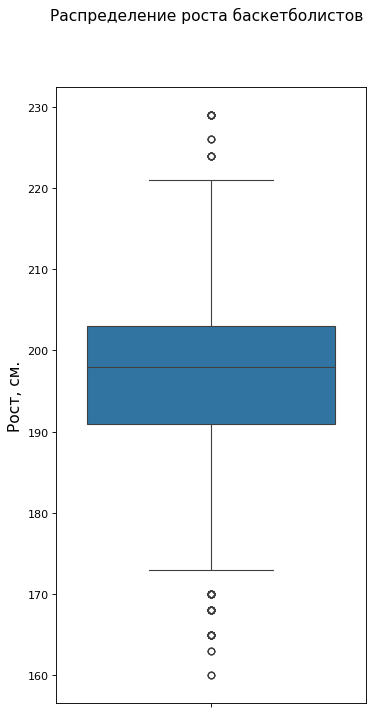

In [18]:
# Draw Plot
plt.figure(figsize=(5, 10), dpi= 80)
sns.boxplot(y='height_cm', data=player_stats, notch=False)

plt.ylabel("Рост, см.", fontsize=14)
plt.suptitle("Распределение роста баскетболистов", fontsize=14)

In [20]:
player_stats['height_cm'].describe()

count    53875.000000
mean       197.445123
std          8.728587
min        160.000000
25%        191.000000
50%        198.000000
75%        203.000000
max        229.000000
Name: height_cm, dtype: float64

Видно что медиана роста баскетболистов - 198 см. 
25 перцентиль роста - 191 см. 
75 перцентиль роста - 203 см. 

# 2.	Посчитать в распределение близком к нормальному  1 л.р. и найденном непрерывном распределении:

### 2.1. Мат.ожидание

In [32]:
player_stats['height_cm'].mean().round(2)

197.45

### 2.2. Дисперсия и стандартное отклонение

In [57]:
np.var(player_stats['height_cm']).round(2)

76.19

In [58]:
np.std(player_stats['height_cm']).round(2)

8.73

### 2.3. Асимметрию

In [54]:
skew(player_stats['height_cm'].dropna().to_list(), bias = False)

-0.22473817417996564

### 2.4. Эксцесс 

In [55]:
kurtosis(player_stats['height_cm'].dropna().to_list(), bias = False)

-0.22915393084438485

Мат. ожидание - 197.45. Разброс между результатами 8 см. Распределение скошено в левую сторону. И распределение имеет меньше значений в хвостах по сравнению с нормальным распределением.

### 2.5. Квантили уровня 0,05 и 0,95; 2,5%-ную точку  для найденной случайной величины. 

Квантили уровня - 0,05

In [60]:
np.percentile(player_stats['height_cm'].dropna(), 5)

183.0

Квантили уровня - 0,95

In [61]:
np.percentile(player_stats['height_cm'].dropna(), 95)

211.0

2,5%-ную точку  для найденной случайной величины

In [62]:
np.percentile(player_stats['height_cm'].dropna(), 2.5)

180.0

## 3.	Построить сравнительную диаграмму найденного распределения и распределения по нормальному закону с параметрами (*, **).

C:\Users\UserProfile\AppData\Local\Temp\ipykernel_14460\2983656003.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(measurements, shade=True, alpha=0.7, bw_adjust=2, ax=axes[0])
C:\Users\UserProfile\AppData\Local\Temp\ipykernel_14460\2983656003.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(player_stats['height_cm'], shade=True, alpha=0.7, bw_adjust=2, ax=axes[1])


Text(0.5, 1.0, 'Распределение роста спортсменов')

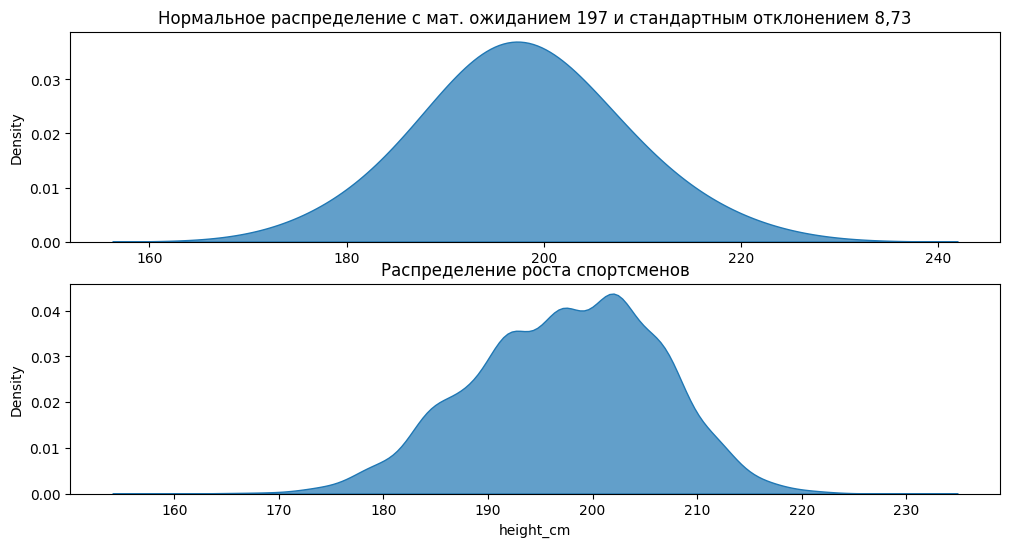

In [87]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

measurements = np.random.normal(
    loc=player_stats['height_cm'].mean(),
    scale=np.std(player_stats['height_cm']),
    size=100
)

ax = sns.kdeplot(measurements, shade=True, alpha=0.7, bw_adjust=2, ax=axes[0])
axes[0].set_title("Нормальное распределение с мат. ожиданием 197 и стандартным отклонением 8,73")
ax = sns.kdeplot(player_stats['height_cm'], shade=True, alpha=0.7, bw_adjust=2, ax=axes[1])
axes[1].set_title("Распределение роста спортсменов")

Видно, что распределения похожи, но видно что реальное распределение имеет скос вправо.